<a href="https://colab.research.google.com/github/mmishra1092/Online-Retail-Customer-Segmentation-/blob/main/MAYANK_MISHRA_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Loading Dataset and Importing Modules**

In [39]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Upload the data path
working_path = '/content/drive/MyDrive/Module: 4/Week_5/Capstone Project: Unsupervised ML: Clustering/Online Retail.xlsx'

In [42]:
# Read Dataset
customer_df = pd.read_excel(working_path)

# **Dataset Information and Summary**

In [43]:
# View first 5 rows of the dataset
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [44]:
# View last 5 rows of the dataset
customer_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [45]:
# Lets check the shape of the dataset
customer_df.shape

(541909, 8)

In [46]:
# Get all the features of dataset
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Feature Discription**

*   InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   Description: Product (item) name. Nominal.
*   Quantity: The quantities of each product (item) per transaction. Numeric.
*   InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*  UnitPrice: Unit price. Numeric, Product price per unit in sterling.
*   CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   Country: Country name. Nominal, the name of the country where each customer resides.

In [47]:
# Check all the information summary of dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [48]:
# Check the uunique values
customer_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [49]:
# View the description of the dataset
customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# Data Preprocessing

In [50]:
# Check the missing values
customer_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

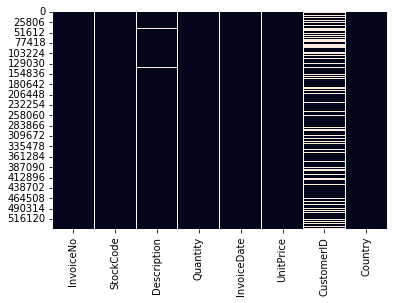

In [51]:
# Plotting the null values on heatmap
sns.heatmap(customer_df.isnull(), cbar = False)

Insight: It is evident from above plot that there are some null values in features Description and CustomerID.

In [52]:
# Lets Drop the null value
customer_df.dropna(inplace = True)

In [53]:
# Lets check the information summary after dropping null values
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [54]:
# View the shape of dataset after dropping null values
customer_df.shape

(406829, 8)

Conclusion: After removing all the null values the observation in our dataset redces to (406829, 8)

In [55]:
# Check duplicate values in our dataset
len(customer_df[customer_df.duplicated()])

5225

Conclusion: We can see that there are 5225 duplicate values in our dataset.


In [56]:
# Lets view the duplicate values in our dataset
customer_df[customer_df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Insight: We can see the duplicate vaues in above description. 

In [57]:
# Now drop the duplicate values from the datase
customer_df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Insight: After dropping the duplicate values the shape of the dataset changes to(401604, 8)



*   We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.



In [58]:
# Lets check the InviceNo that starts with c
customer_df['InvoiceNo'] = customer_df['InvoiceNo'].astype('str')
customer_df[customer_df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [59]:
customer_df = customer_df[~customer_df['InvoiceNo'].str.contains('C')]
customer_df.shape

(397924, 8)

In [64]:
# Convert InvoiceDate column into 'year','month','day','hour','minute' and second
customer_df['InvoiceDate_year'] = customer_df['InvoiceDate'].dt.year
customer_df['InvoiceDate_month'] = customer_df['InvoiceDate'].dt.month
customer_df['InvoiceDate_day'] = customer_df['InvoiceDate'].dt.day
customer_df['InvoiceDate_hour'] = customer_df['InvoiceDate'].dt.hour
customer_df['InvoiceDate_minute'] = customer_df['InvoiceDate'].dt.minute
customer_df['InvoiceDate_second'] = customer_df['InvoiceDate'].dt.second
print('columns and data types')
pd.DataFrame(customer_df.dtypes).rename(columns = {0:'dtype'})

columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [65]:
()# Lets again check shape of the dataset
customer_df.shape

(397924, 14)

In [66]:
# View the added columns in data
customer_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

# Exploratory Data Analysis(EDA)

First lets analyze the customers. We will check if each row has a single customer or not. If not than how many customers id we have.

In [67]:
# Lets check the unique id of the customer
customer_df['CustomerID'].nunique()

4339

Conclusion: In 397924 rows we have 4339 customers only.

In [68]:
# Most active customers
active_customers = pd.DataFrame(customer_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,16990.0,1
4335,16148.0,1
4336,13391.0,1
4337,13366.0,1


Text(0, 0.5, 'Count')

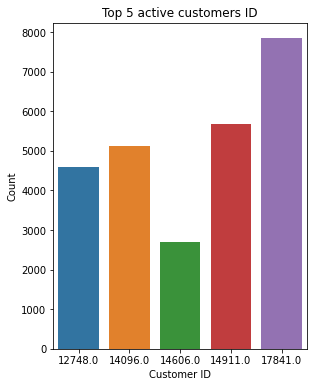

In [79]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

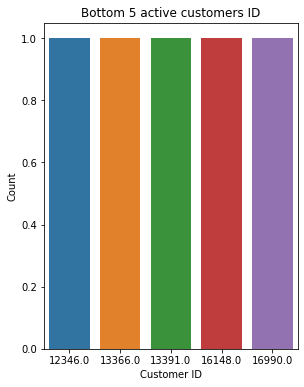

In [81]:
# Bottom 5 customer id
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sns.barplot(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

# Analysis of categorical features

In [82]:
# Analyze categorical features
categorical_columns = list(customer_df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [89]:
# View the Invoiceno counts
customer_df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
565591      1
542915      1
567486      1
567362      1
576586      1
Name: InvoiceNo, Length: 18536, dtype: int64

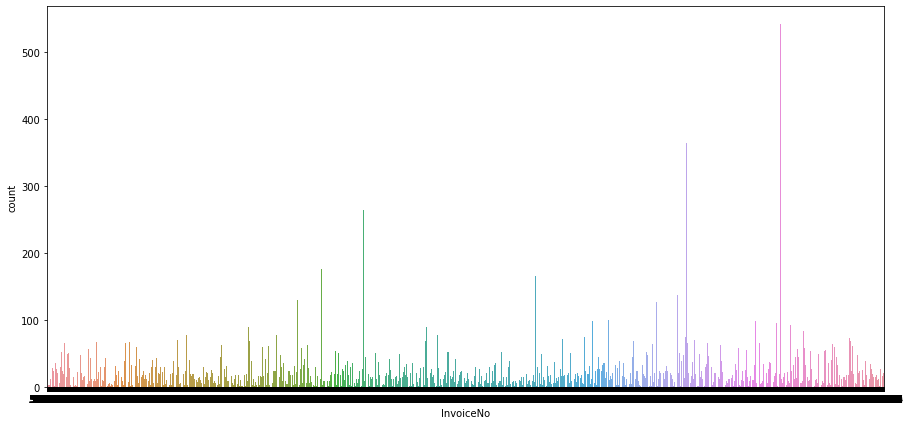

In [94]:
# Plot the invoice count
plt.figure(figsize=(15,7))
sns.countplot(x = 'InvoiceNo', data = customer_df)

# **StockCode**

In [96]:
# Create a variable and count the stockcode
stockcode_df = customer_df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


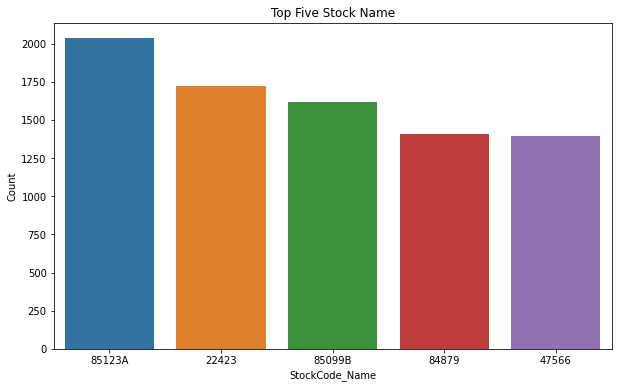

In [104]:
# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])

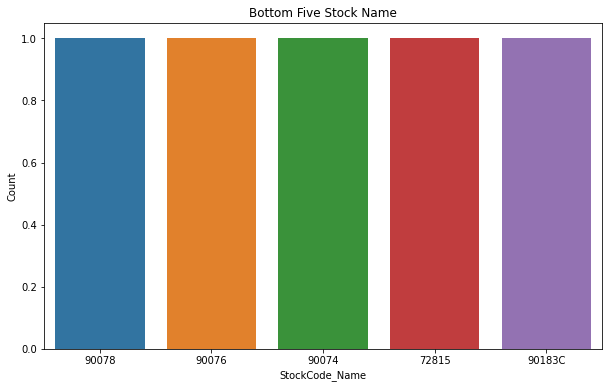

In [106]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])

# **Description**

In [109]:
# Create a variable and check the description variable
Description_df = customer_df['Description'].value_counts().reset_index()
Description_df.rename(columns = {'index':'Description_Name'},inplace = True)
Description_df.rename(columns = {'Description':'Count'}, inplace = True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [110]:
# Bottom 5 product
Description_df.tail()

,Description_Name,Count
3872,BLACK GLASS BRACELET W HEART CHARMS,1
3873,SILVER BOOK MARK WITH BEADS,1
3874,JARDIN ETCHED GLASS BUTTER DISH,1
3875,NEW BAROQUE B'FLY NECKLACE PINK,1
3876,PINK DAISY BAG CHARM,1


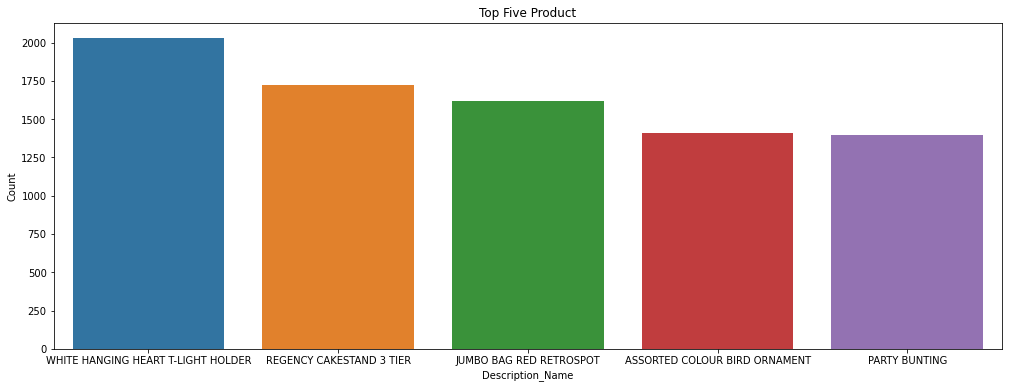

In [116]:
# Plot the top 5 product
plt.figure(figsize=(17,6))
plt.title('Top Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.head(5))

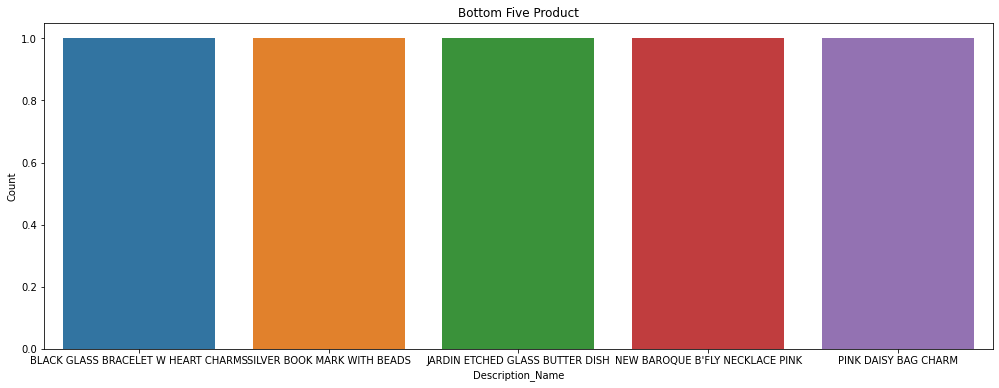

In [119]:
# Plot the bottom 5 product
plt.figure(figsize=(17,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.tail(5))

# **Country**

In [120]:
# Create a variable and check the country variable and check top 5 countries
country_df = customer_df['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'Country_Name'}, inplace = True)
country_df.rename(columns = {'Country':'Count'}, inplace = True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [121]:
# Bottom 5 countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


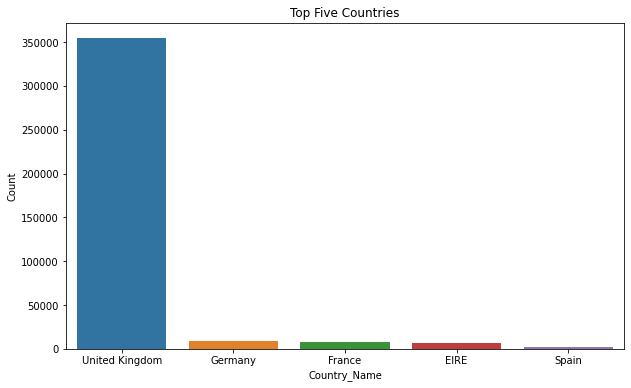

In [123]:
# Plot the top 5 countries
plt.figure(figsize=(10,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count', data = country_df.head(5))

Insight: From above plot we can see that majority of customers are from United Kingdom.

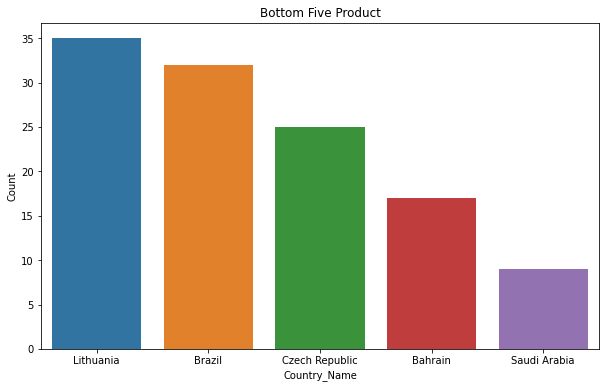

In [124]:
# Plot bottom 5 countries
plt.figure(figsize=(10,6))
plt.title('Bottom Five Product')
sns.barplot(x='Country_Name', y='Count', data = country_df.tail(5))

Insight: The least number of customers are from Saudi Arabia.

# **Analyzing all Numerical Features**

In [126]:
# Assigning numerical columns to variables
numerical_columns = list(customer_df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

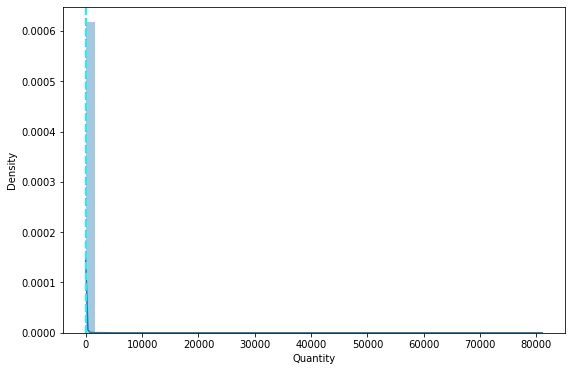

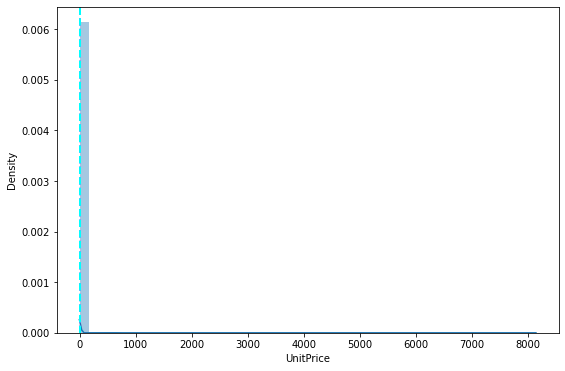

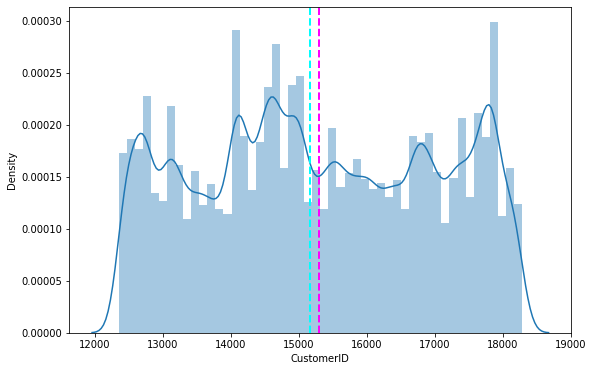

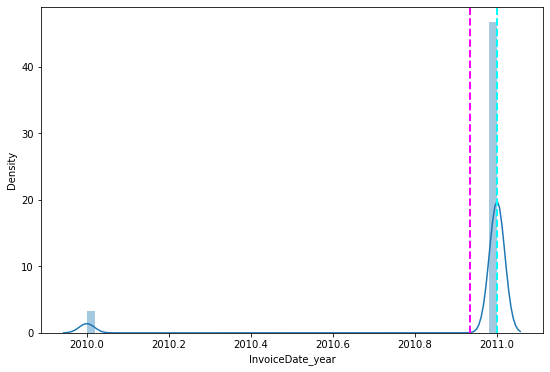

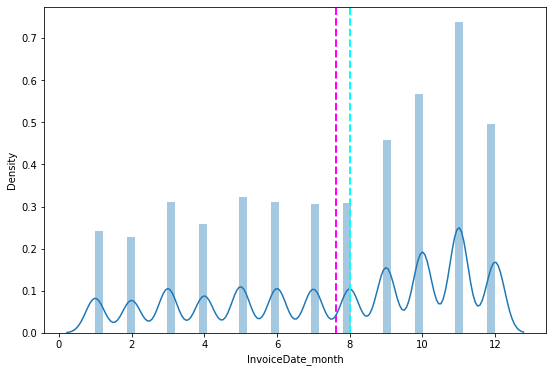

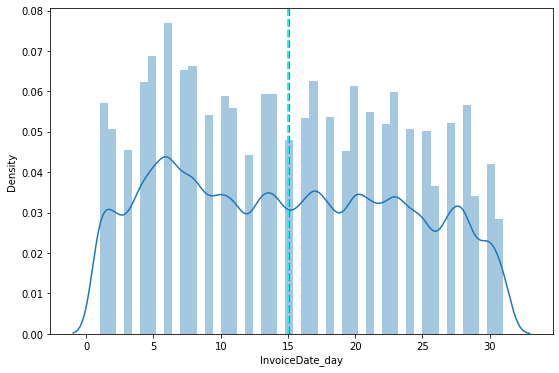

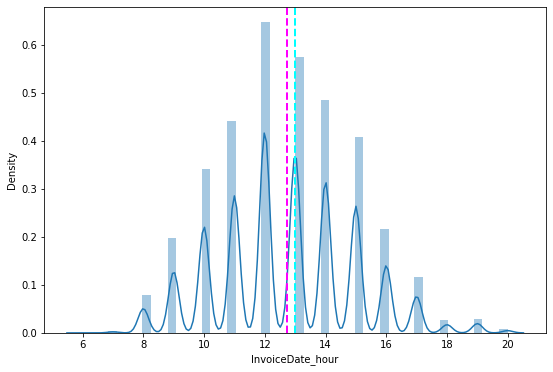

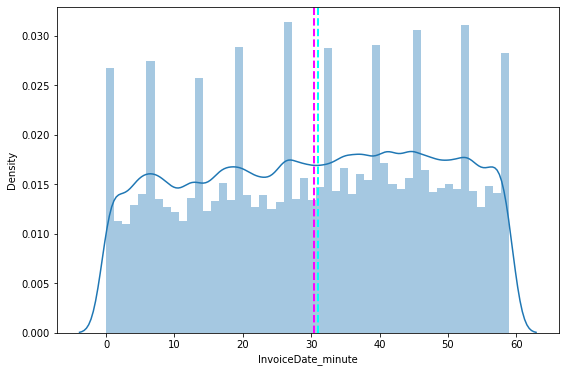

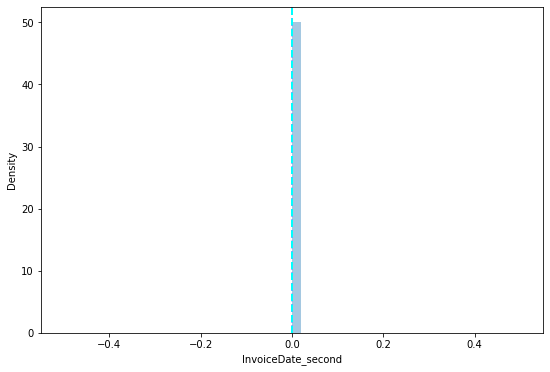

In [128]:
# Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = customer_df[col]
    sns.distplot(x=customer_df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

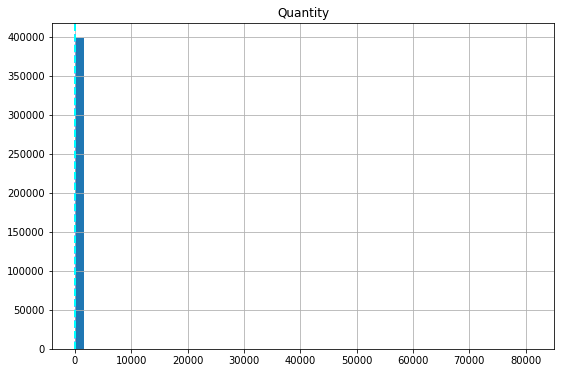

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


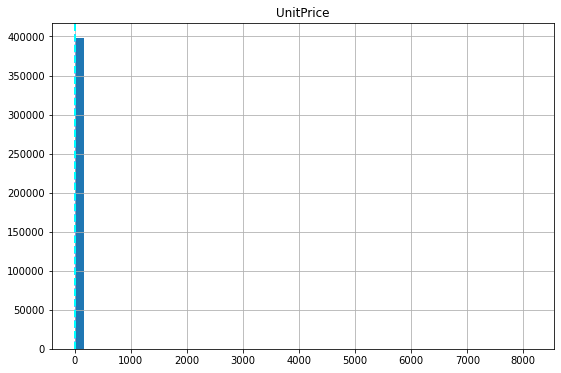

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


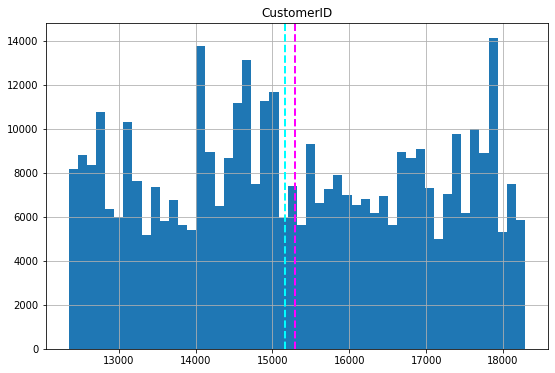

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


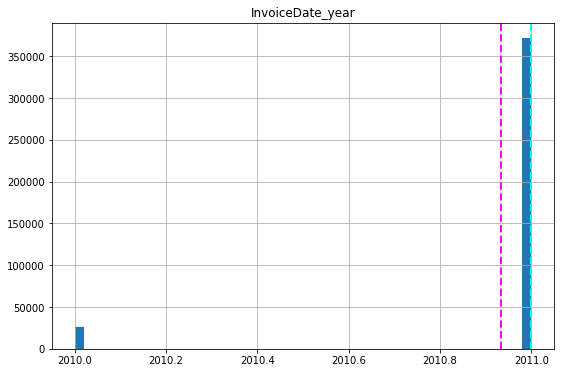

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


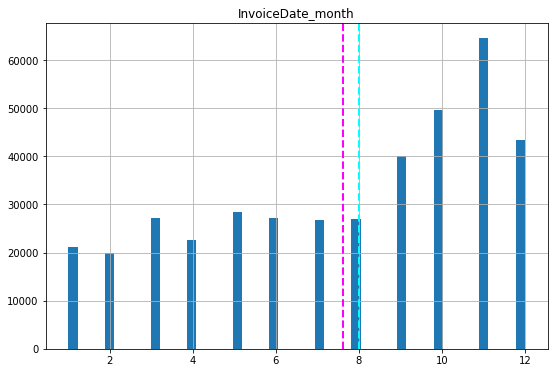

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


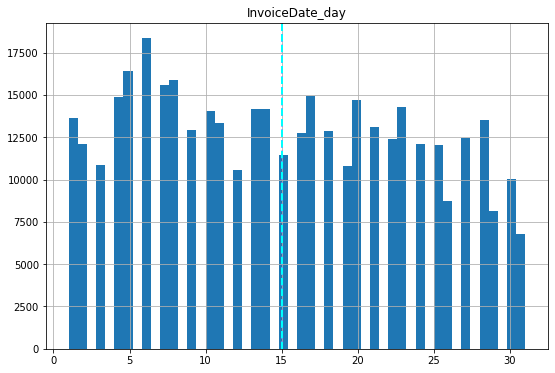

Skewness : 0.1144792789730314
Kurtosis : -1.1728727400772625


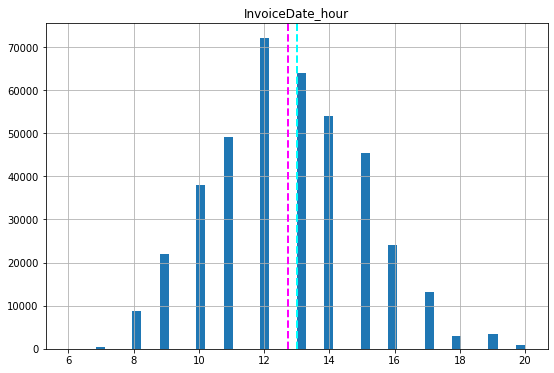

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


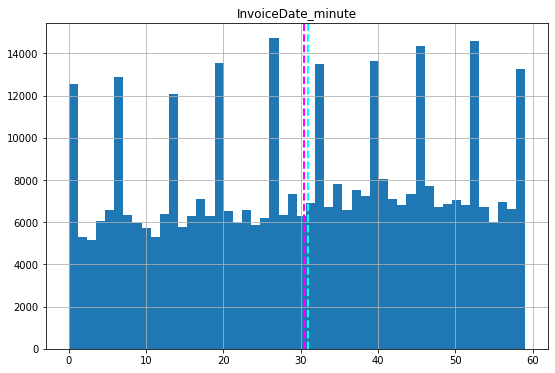

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


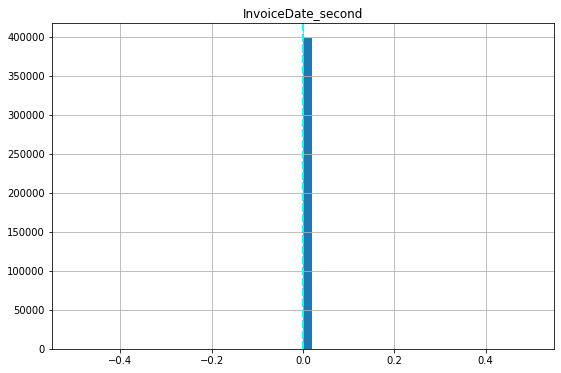

Skewness : 0
Kurtosis : 0


In [129]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (customer_df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",customer_df[col].skew())
  print( "Kurtosis :",customer_df[col].kurt())

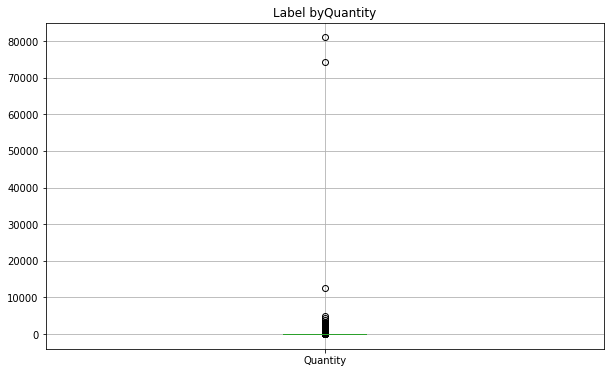

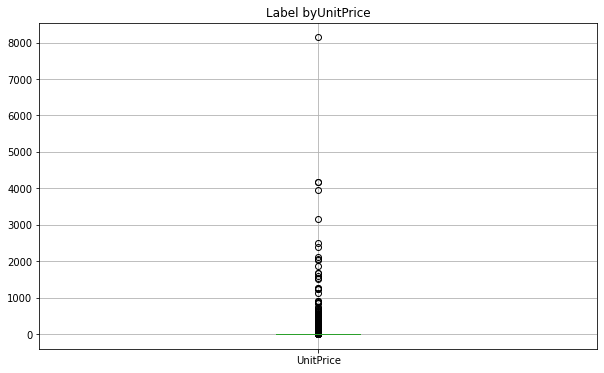

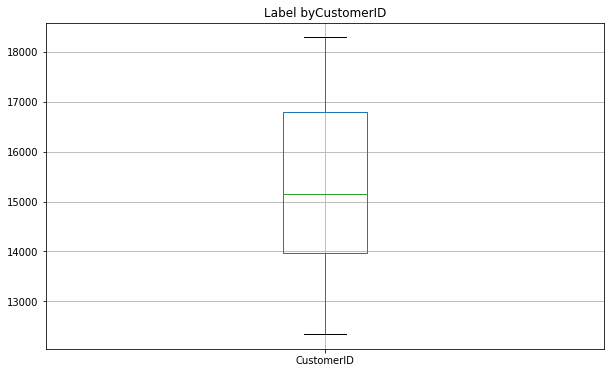

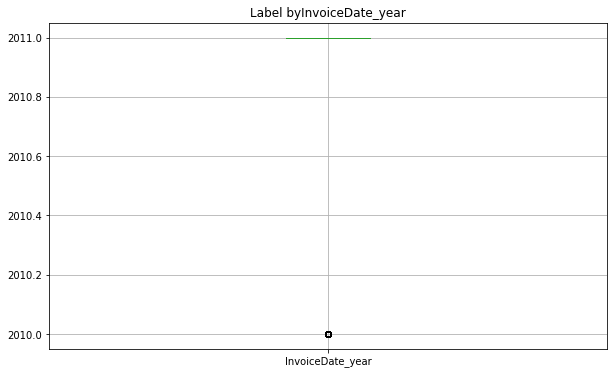

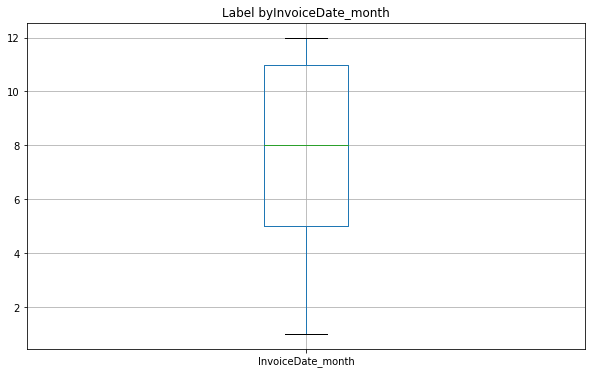

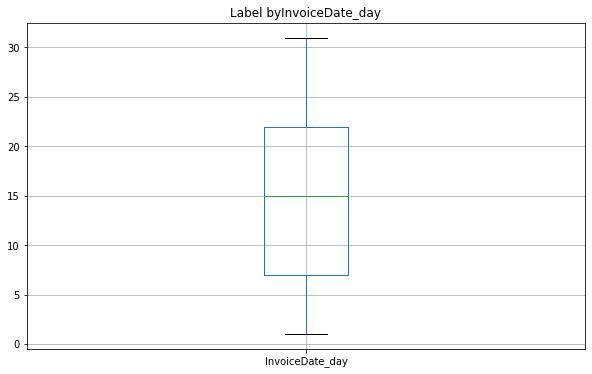

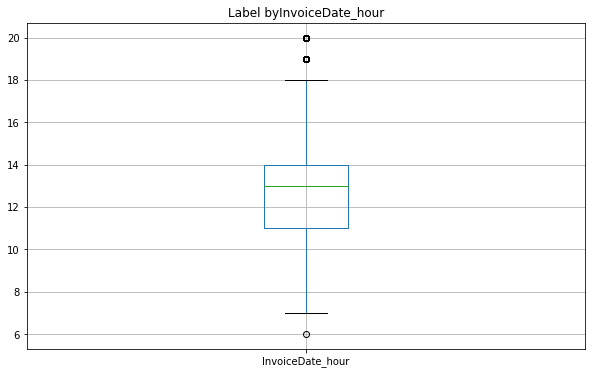

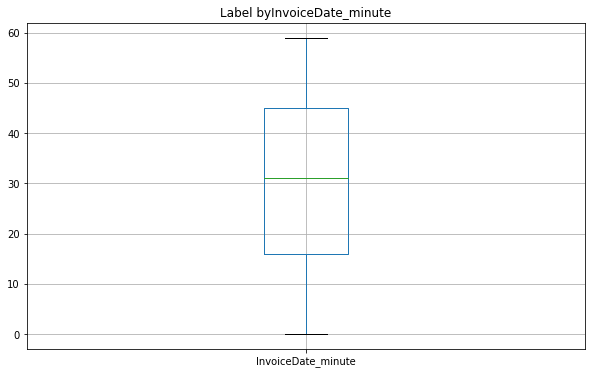

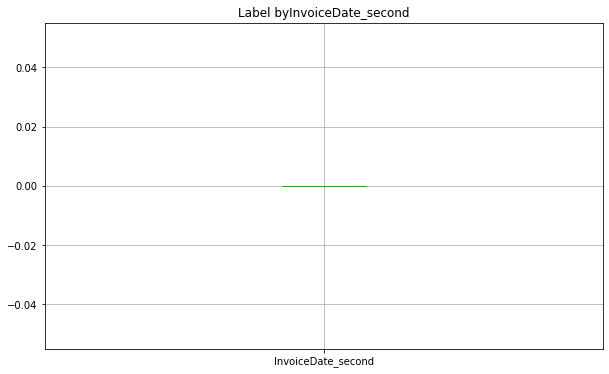

In [130]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  customer_df.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()

# **Correlation Matrix**

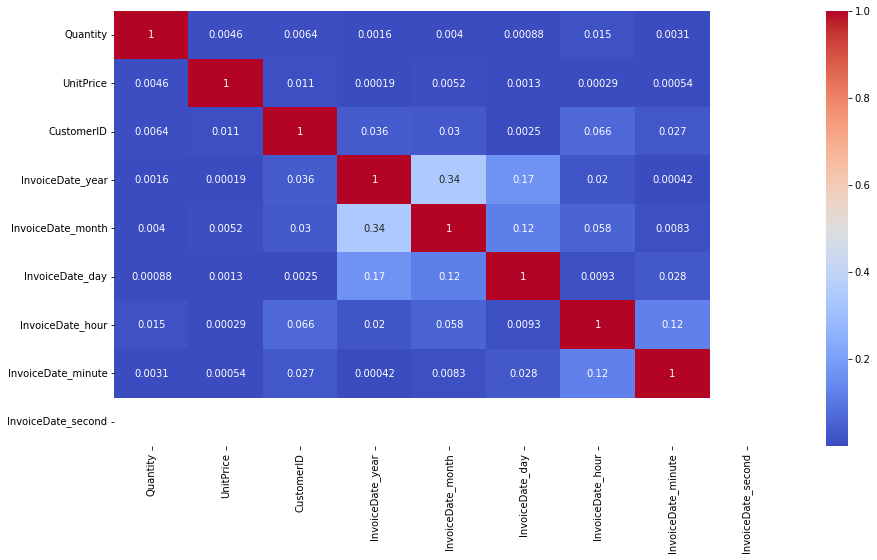

In [132]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = customer_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")